<img src="header_profi.png" align="left"/>

# Anwendungsbeispiel Analysis and quality control of data 

Die Ziel dieses Beispieles ist es die Methoden der Datenanalyse nochmals zu zeigen und deren Notwendigkeit zu begründen.


- Datentypen und Form der Daten
- Visualisierung
- Fehlende Daten
- Statistische Werte
- Outliers und Anomalien in den Daten
- Korrelationen und Beziehungen zwischen den Features
- Untersuchung der Trainingsdaten
- Stabilere Prüfung der Modellqualität


Code und Informationen entnommen von:

- [https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- [https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb](https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb)

# Import der Module

In [3]:
#
# Import der Module
#
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip

from scipy import stats
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN

#
# Abdrehen von Fehlermeldungen
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)
simplefilter(action='ignore', category=RuntimeWarning)


#
# Tensorflow und Keras
#
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 9]


#
# Ausgabe der Versionen
#
print('working on keras version {} on tensorflow {} using sklearn {}'.format ( tf.keras.__version__, tf.version.VERSION, sklearn.__version__ ) )

working on keras version 2.2.4-tf on tensorflow 1.14.0 using sklearn 0.23.2


# Datentypen und Form der Daten

https://numpy.org/devdocs/user/basics.types.html

<img src="info.png" align="left"/> 

In [4]:
# 
# Laden der Daten
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv('data/iris/iris_mutilated.csv', names=names)

In [5]:
#
# Anzeige der Form der Daten
#
print(iris.shape)

(153, 5)


In [6]:
#
# Anzeige der Datentypen
#
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  153 non-null    float64
 1   sepal-width   153 non-null    float64
 2   petal-length  152 non-null    float64
 3   petal-width   151 non-null    float64
 4   class         153 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB
None


# Visualisierung

In [7]:
#
# Anzeige von Samples zur Visualisierung der Inhalte
#
print(iris.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.0          0.2  Iris-setosa
1           4.9          3.0           NaN          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
print(iris.tail())

     sepal-length  sepal-width  petal-length  petal-width           class
148           6.7          3.0           5.2          2.3  Iris-virginica
149           6.3          2.5           5.0          1.9  Iris-virginica
150           6.5          3.0           5.2          2.0  Iris-virginica
151           6.2          3.4           5.4          2.3  Iris-virginica
152           5.9          3.0           5.1          1.8  Iris-virginica


# Fehlende Daten

In [9]:
#
# Liste alle Reihen mit fehlenden Werten
# any(axis=1) liefert ein True, wenn eines der Features über die axis 1 True ist
# 
iris[iris.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class
1,4.9,3.0,NaN,0.2,Iris-setosa
108,7.6,3.0,6.6,NaN,Iris-virginica
109,4.9,2.5,4.5,NaN,Iris-virginica


In [10]:
iris.mean()

sepal-length    5.820915
sepal-width     3.056863
petal-length    3.728947
petal-width     1.169536
dtype: float64

In [11]:
#
# Ersetzen durch Mittelwert des Features (grauslich)
#
iris_non = iris.fillna(iris.mean())

In [12]:
iris_non[iris_non.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


Füllen von fehlenden Werte mit dem Mittelwert des Features erzeugt neue Datenpunkte, die potentiell störend sind. Alternativ können die Datenpunkte gelöscht werden.

# Duplikate

In [13]:
#
# Prüfung auf Duplikate zeigt zwar doppelte Werte, aber keine massiven Störungen
# bis auf Weiteres keine Änderung 
#
iris_non[iris_non.duplicated(keep=False)]

,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.7,3.2,1.6,0.2,Iris-setosa
32,4.7,3.2,1.6,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
40,4.9,3.1,1.5,0.1,Iris-setosa
104,5.8,2.7,5.1,1.9,Iris-virginica
145,5.8,2.7,5.1,1.9,Iris-virginica


# Einfache Statistiken

In [14]:
#
# Verteilung der Labels (Klassen)
#
print(iris_non.groupby('class').size())

class
Iris-setosa        53
Iris-versicolor    50
Iris-virginica     50
dtype: int64


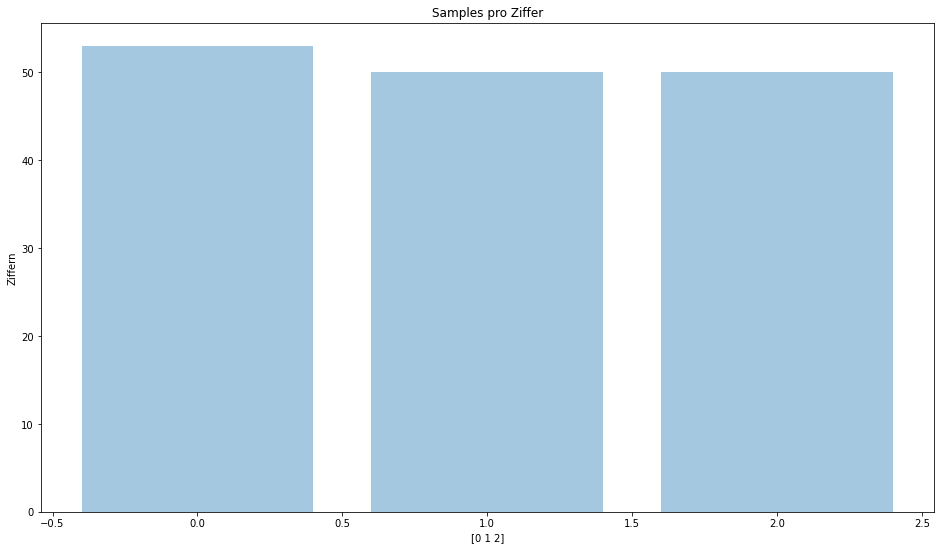

In [15]:
#
# Histogramm der Klassen als Plot 
#
#
# Prüfen der Verteilung der Klassen
#
df = pd.DataFrame(iris_non,columns=['class'])
counts= df.groupby('class').size()
class_pos = np.arange(3)
plt.bar(class_pos, counts, align='center', alpha=0.4)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()

In [16]:
#
# Analyse der Verteilung der Werte in den Features als Tabelle
#
iris_non.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,153.000000,153.000000,153.000000,153.000000
mean,5.820915,3.056863,3.728947,1.169536
std,0.835137,0.429774,1.766264,0.763389
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Outliers und Anomalien in den Daten

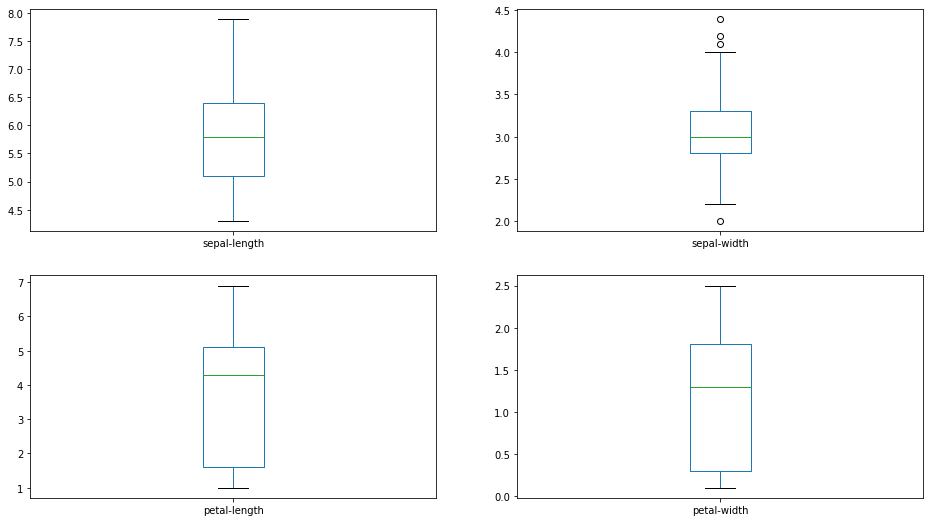

In [17]:
#
# Analyse der Verteilung der Werte in den Features als Boxplot (outliers)
#
iris_non.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [18]:
#
# Mathematische Berechnung
#

In [19]:
values = iris_non.values[:,:-1].astype(np.float64)

In [20]:
z = np.abs(stats.zscore(values))
print(z)

[[8.66064201e-01 1.03447934e+00 1.55011341e+00 1.27421388e+00]
 [1.10633224e+00 1.32742924e-01 0.00000000e+00 1.27421388e+00]
 [1.34660028e+00 3.34145981e-01 1.37970558e+00 1.27421388e+00]
 [1.46673430e+00 1.00701529e-01 1.26610035e+00 1.27421388e+00]
 [9.86198220e-01 1.26792379e+00 1.32290296e+00 1.27421388e+00]
 [5.05662145e-01 1.96825715e+00 1.15249512e+00 1.01136375e+00]
 [1.46673430e+00 8.01034886e-01 1.32290296e+00 1.14278881e+00]
 [9.86198220e-01 8.01034886e-01 1.26610035e+00 1.27421388e+00]
 [1.70700233e+00 3.66187377e-01 1.32290296e+00 1.27421388e+00]
 [1.10633224e+00 1.00701529e-01 1.26610035e+00 1.40563895e+00]
 [5.05662145e-01 1.50136824e+00 1.26610035e+00 1.27421388e+00]
 [1.22646626e+00 8.01034886e-01 1.20929774e+00 1.27421388e+00]
 [1.22646626e+00 1.32742924e-01 1.32290296e+00 1.40563895e+00]
 [1.82713635e+00 1.32742924e-01 1.49331080e+00 1.40563895e+00]
 [2.51260693e-02 2.20170160e+00 1.43650819e+00 1.27421388e+00]
 [1.45260088e-01 3.13547941e+00 1.26610035e+00 1.011363

In [21]:
#
# Filtern aller Werte mit z-score >= 3
#
iris_non_noo = iris_non[(z < 3).all(axis=1)]

In [22]:
iris_non_noo.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.000000,0.2,Iris-setosa
1,4.9,3.0,3.728947,0.2,Iris-setosa
2,4.7,3.2,1.300000,0.2,Iris-setosa
3,4.6,3.1,1.500000,0.2,Iris-setosa
4,5.0,3.6,1.400000,0.2,Iris-setosa


In [23]:
iris_non_noo.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,152.000000,152.000000,152.000000,152.000000
mean,5.821711,3.048026,3.743611,1.174599
std,0.837840,0.417017,1.762734,0.763331
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


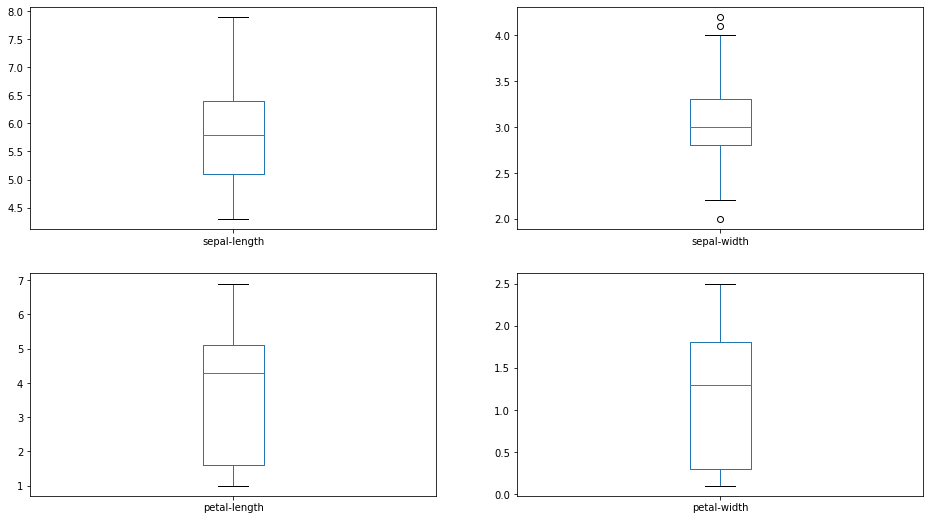

In [24]:
#
# Analyse der Verteilung der Werte in den Features als Boxplot (outliers)
#
iris_non_noo.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [25]:
#
# Finden von outliers durch Clustering (Teil des KI Profi Kurses)
#
outlier_detection = DBSCAN( min_samples = 2, eps = 0.9 )
clusters = outlier_detection.fit_predict( iris_non.values[:,:-1] )
list(clusters).count(-1)

1

In [26]:
#
# Zu welchen clustern wurden die Samples zugeordnet? Outliers werden mit -1 markiert.
#
print(clusters)

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


# Korrelationen und Beziehungen zwischen den Features

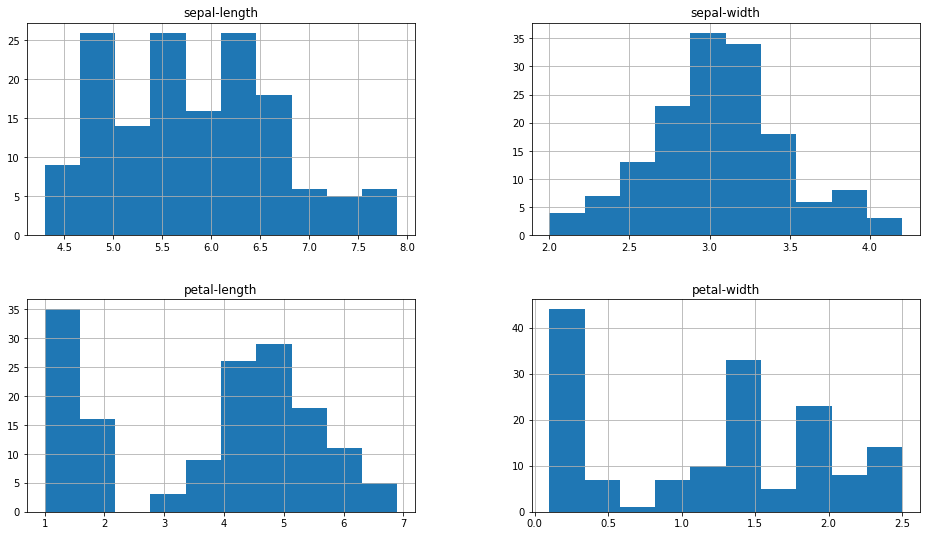

In [27]:
#
# Analyse der Verteilung der Werte in den Features als Histogram
#
iris_non_noo.hist()
plt.show()

In [28]:
#
# Mathematische Analyse der Beziehungen zwischen den Features (Korrelation)
#
iris_non.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.116247,0.870525,0.817397
sepal-width,-0.116247,1.000000,-0.426164,-0.354123
petal-length,0.870525,-0.426164,1.000000,0.949181
petal-width,0.817397,-0.354123,0.949181,1.000000


<AxesSubplot:>

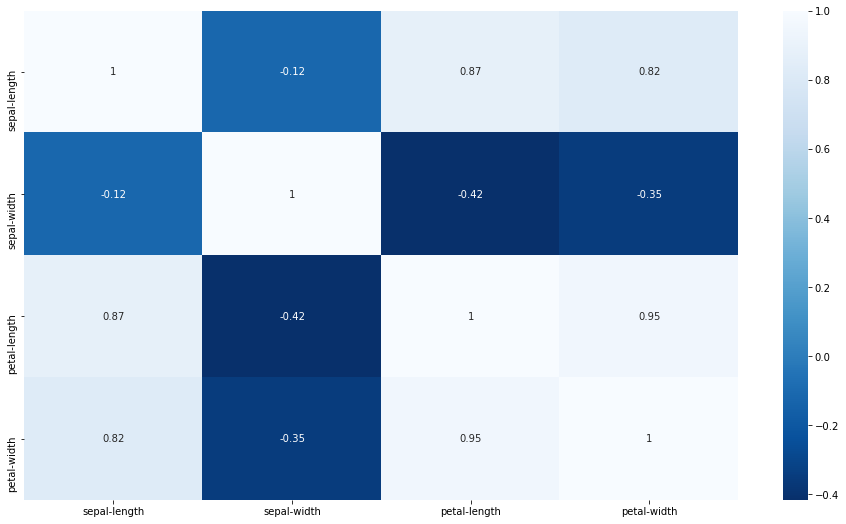

In [29]:
sns.heatmap(iris_non_noo.corr(),annot=True,cmap='Blues_r')

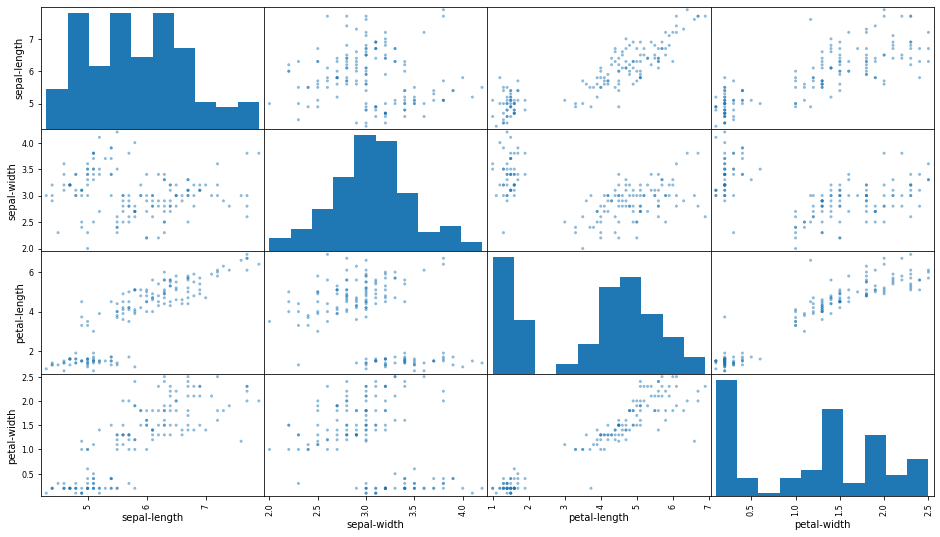

In [30]:
#
# Darstellung der Beziehungen zwischen den Features als Matrix Plot
#
scatter_matrix(iris_non_noo)
plt.show()

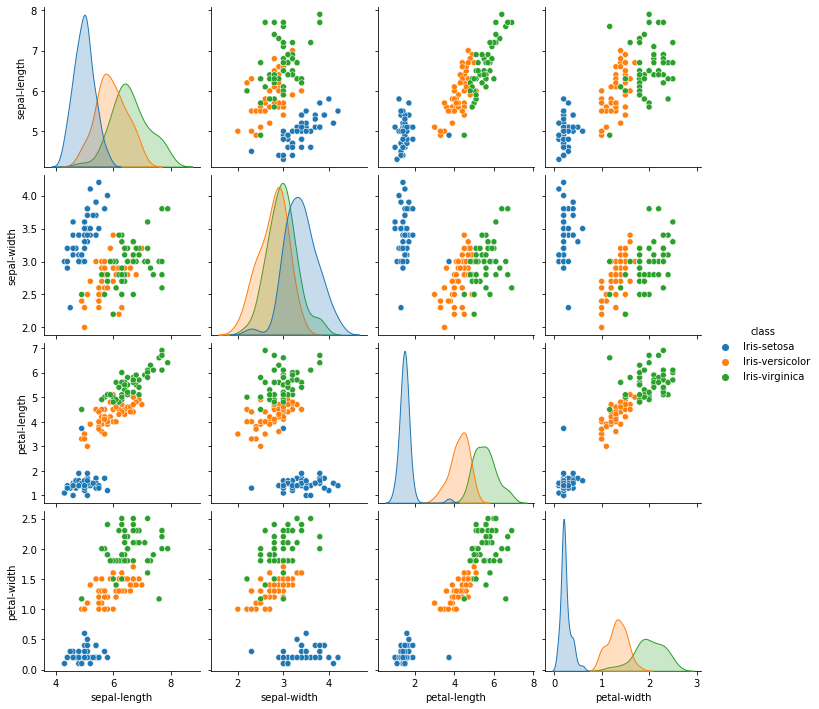

In [31]:
#
# Darstellung der Beziehungen zwischen den Features als Matrix Plot mit Unterscheidung der Klassen
# Eine wichtige Fragestellung ist dabei die Separierbarkeit
#
sns.pairplot(iris_non_noo,hue='class')

In [32]:
#
# Neue Form der Darstellung der Zusammenhänge zwischen Features und Klassen
#

In [33]:
iris_data = iris_non_noo.to_dict('records')
iris_data[:2]

[{'sepal-length': 5.1,
  'sepal-width': 3.5,
  'petal-length': 1.0,
  'petal-width': 0.2,
  'class': 'Iris-setosa'},
 {'sepal-length': 4.9,
  'sepal-width': 3.0,
  'petal-length': 3.728947368421053,
  'petal-width': 0.2,
  'class': 'Iris-setosa'}]

In [34]:
hip.Experiment.from_iterable(iris_data).display(force_full_width=True)

<IPython.core.display.Javascript object>

# Prüfung der Modellqualität und implizit auch der Trainingsdatenqualität

[https://scikit-learn.org/stable/modules/cross_validation.html](https://scikit-learn.org/stable/modules/cross_validation.html)

<img src="info.png" align="left"/> 

In [35]:
# 
# Aufteilen in Training Daten und Testdaten
#
array = iris_non_noo.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.01
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=42)

In [36]:
#
# Test einer Reihe von Modellen gleichzeitig. Dabei werden mehrere Verteilungen von Trainingsdaten
# erzeugt und trainiert. Dadurch wird sichtbar, wenn die Verteilung der Trainingsdaten nicht ausreichend
# breit ist (hohe Varianz). Mehr zu weiteren Methoden unter:
# https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn
#

scoring = 'accuracy'

# Modelle anlegen
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5,metric='euclidean')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [37]:
#
# Testen mit mehreren unterschiedlichen zufälligen Aufteilungen der Daten
#
results = []
names = []
for name, model in models:
    
    kfold = model_selection.KFold( n_splits=20, random_state=42,shuffle=True)
    
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print("Modell {}: accuracy {:.3f} (deviation {:.3f})".format(name, cv_results.mean(), cv_results.std()))

Modell KNN: accuracy 0.962 (deviation 0.071)
Modell CART: accuracy 0.954 (deviation 0.074)
Modell NB: accuracy 0.946 (deviation 0.089)
Modell SVM: accuracy 0.967 (deviation 0.073)


In [38]:
#
# Testen mit mehreren unterschiedlichen Aufteilungen der Daten wobei die Klassenverteilung gleich bleibt
#
results = []
names = []
for name, model in models:
    
    skfold = model_selection.StratifiedKFold(n_splits=20, random_state=42,shuffle=True)
    
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=skfold, scoring=scoring)
    print("Modell {}: accuracy {:.3f} (deviation {:.3f})".format(name, cv_results.mean(), cv_results.std()))


Modell KNN: accuracy 0.960 (deviation 0.062)
Modell CART: accuracy 0.938 (deviation 0.104)
Modell NB: accuracy 0.946 (deviation 0.081)
Modell SVM: accuracy 0.965 (deviation 0.075)


# Untersuchung der Trainingsdaten mit MNIST


In [61]:
#
# Laden der MNIST Daten und des Modelles
#
# MNIST Daten mit Transformationen
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train = x_train.astype('float32')
x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes=10)

In [62]:
#
# Anzeige der Anzahl und Form der Samples
#
print('Trainingsdaten: X=%s, y=%s' % (x_train.shape, y_train.shape))

Trainingsdaten: X=(60000, 28, 28, 1), y=(60000, 10)


In [63]:
# Modell aus Beispiel 4
from keras.models import model_from_json
prefix = 'results/04_'
modelName = prefix + "model.json"
weightName = prefix + "model.h5"
json_file = open(modelName, 'r')
loaded_model_json = json_file.read()
json_file.close()
# model aus json
loaded_model = model_from_json(loaded_model_json)
# gewichte aus h5 file
loaded_model.load_weights(weightName)
print("loaded model from disk")

loaded model from disk


In [64]:
# Test der Prediction
image = x_train[0].reshape((1,28,28,1))    
prediction_activation = loaded_model.predict([image])
predictedClass = np.argmax ( prediction_activation[0] )
confidence = prediction_activation[0][predictedClass]
predictedClass

5

## Confusion matrix on training data

In [65]:
#
# Test mit confusion matrix
#
y_train_hat = loaded_model.predict_classes (x_train)

In [66]:
y_train_class = np.argmax ( y_train, axis=1 )

In [67]:
print(y_train_hat.shape)
print(y_train_class.shape)

(60000,)
(60000,)


In [69]:
cm = confusion_matrix(y_train_class, y_train_hat)

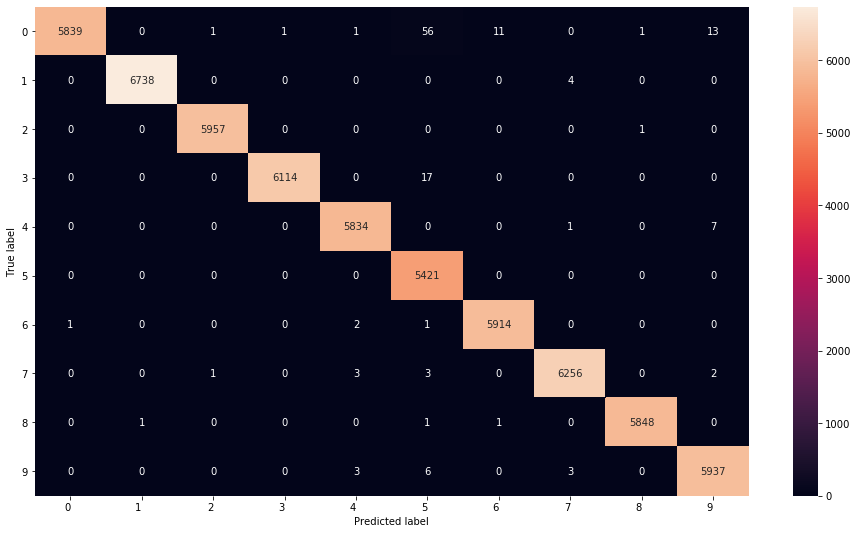

In [70]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names )
fig = plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Daten mit niedriger Erkennung

In [71]:
#
# Untersuchung aller Trainingsdaten mit Modell und Suche nach niedriger confidence
#

predictionConfidencePerClass = [[] for i in range(10)]
errorCount = 0
errorCountDistribution = [0] * 10
suspectList = []
suspectListConfidence = []

for i in range( x_train.shape[0] ):
    
    correctClass = np.argmax(y_train[i])
    image = x_train[i].reshape((1,28,28,1))
    prediction_activation = loaded_model.predict([image])
    predictedClass = np.argmax ( prediction_activation[0] )
    confidence = prediction_activation[0][predictedClass]
    if predictedClass != correctClass:
        errorCountDistribution[correctClass] = errorCountDistribution[correctClass] + 1
    else:
        if confidence < 0.9:
            predictionConfidencePerClass[correctClass].append(confidence)
            errorCount+= 1
            
        if confidence < 0.6:
            suspectList.append(i)
            suspectListConfidence.append(confidence)
            

In [72]:
print('Anzahl der gefundenen Fälle ist {}'.format(errorCount))

Anzahl der gefundenen Fälle ist 215


In [73]:
predictionConfidencePerClassNP = np.asarray(predictionConfidencePerClass)

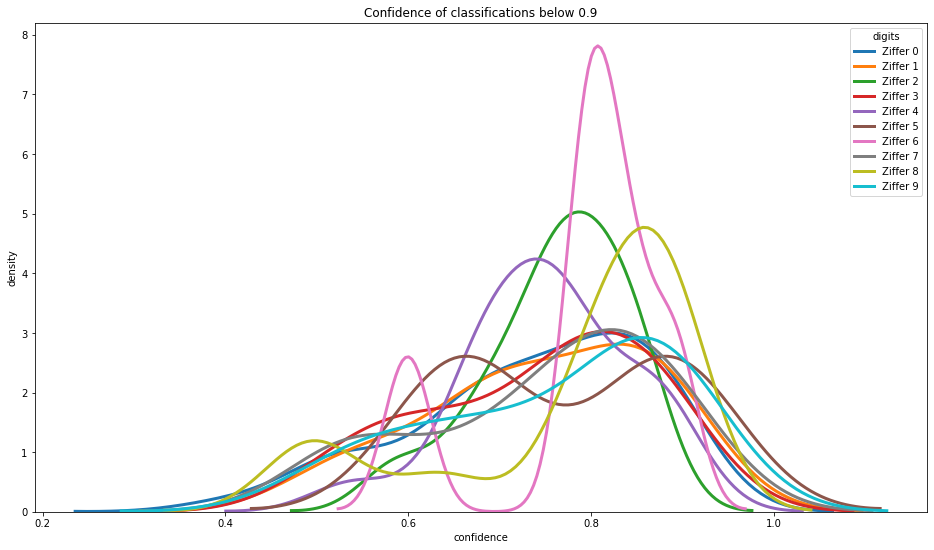

In [74]:
for clazzz in range(10):
    # Subset to the airline
    
    subset = predictionConfidencePerClassNP[clazzz]
    
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Ziffer {}'.format(clazzz) )
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'digits')
plt.title('Confidence of classifications below 0.9')
plt.xlabel('confidence')
plt.ylabel('density')
plt.show()

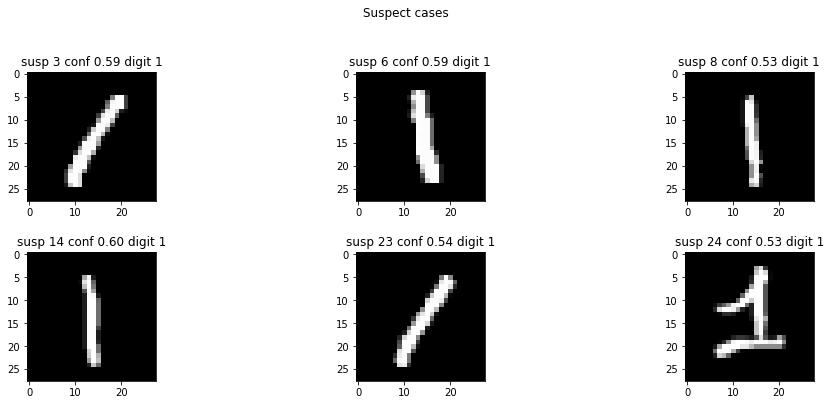

In [77]:
fig = plt.figure()

fig.suptitle('Suspect cases')
plotCount = 0

for i in range(len(suspectList)):
    correctClass = np.argmax(y_train[i])
    if plotCount < 9 and correctClass == 1:
            ax = plt.subplot(330 + 1 + plotCount)
            ax.set_title('susp {} conf {:.2f} digit {}'.format ( i, suspectListConfidence[i], correctClass ) )     
            image = x_train[i].reshape((28,28))
            plt.imshow(image, cmap=plt.get_cmap('gray'))    
            plotCount+= 1
        

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()